# WEATHER PREDICTION

In [46]:
import numpy as np   #linear algebra   
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns   #for visualization of the data
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder      #for feature scaling
from sklearn.model_selection import train_test_split   #to split train and test data set
from sklearn.linear_model import LogisticRegression     #algorithm to the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics             #to check for accuracy
from sklearn.metrics import confusion_matrix   #for confusion matrix

In [2]:
data=pd.read_csv("C://Users//Shani//Desktop//seattle-weather.csv")

In [42]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,10.9,10.6,2.8,4.5,rain,2012,01,02
2,0.8,11.7,7.2,2.3,rain,2012,01,03
3,20.3,12.2,5.6,4.7,rain,2012,01,04
4,1.3,8.9,2.8,6.1,rain,2012,01,05


### Data Preprocessing

In [ ]:
data.shape

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   year           1461 non-null   object 
 6   month          1461 non-null   object 
 7   day            1461 non-null   object 
dtypes: float64(4), object(4)
memory usage: 91.4+ KB


In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data.skew()

In [ ]:
data.describe()

### Spliting the data column into day , months , year

In [3]:
data[['year','month','day',]]=data['date'].str.split('-',expand=True)

In [ ]:
data.head()

In [4]:
data.drop('date',axis=1,inplace=True)

In [44]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,10.9,10.6,2.8,4.5,rain,2012,01,02
2,0.8,11.7,7.2,2.3,rain,2012,01,03
3,20.3,12.2,5.6,4.7,rain,2012,01,04
4,1.3,8.9,2.8,6.1,rain,2012,01,05


### EDA Process

#### Univariant Analysis

In [5]:
column=['precipitation', 'temp_max', 'temp_min', 'wind']

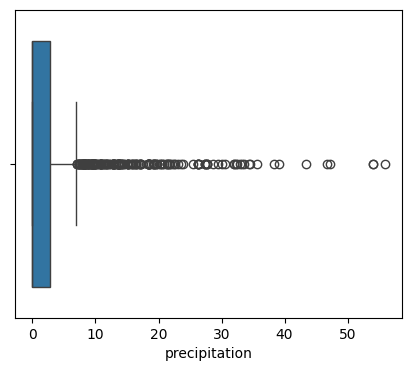

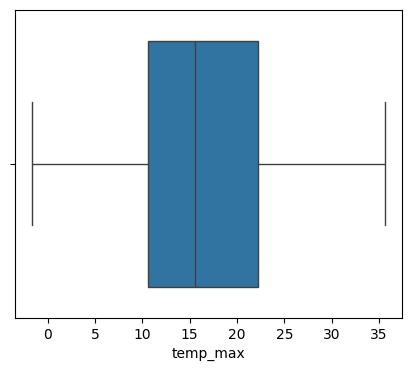

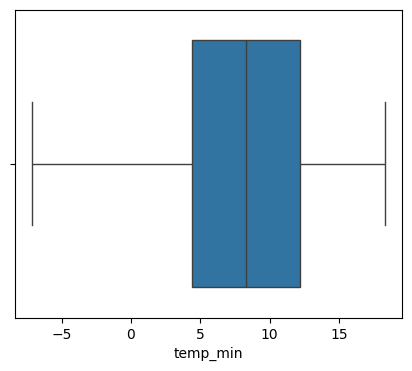

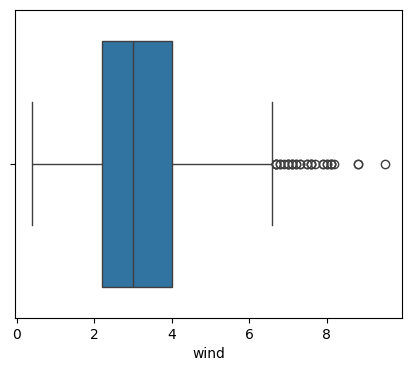

In [7]:
for i in column:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=i, data=data)
    plt.show()


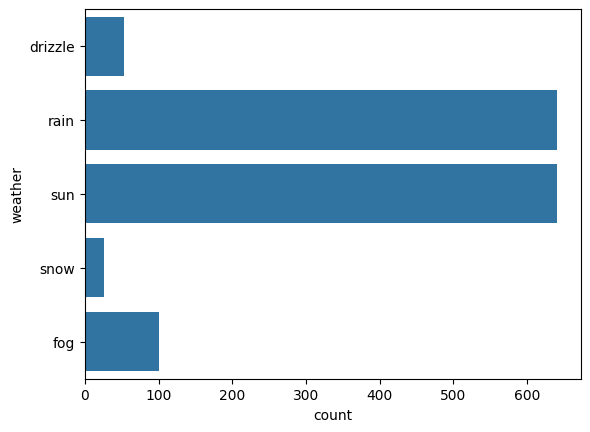

In [8]:
sns.countplot(data['weather'])
plt.show()

#### Bivariant Analysis

In [9]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

<Axes: xlabel='temp_max', ylabel='Count'>

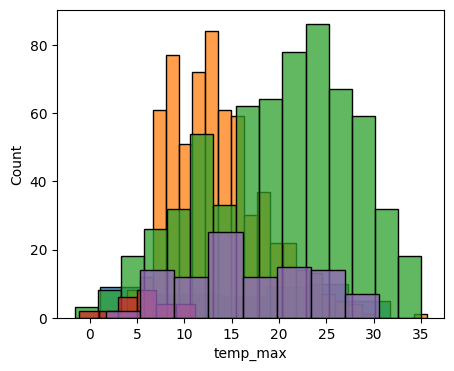

In [41]:
plt.figure(figsize=(5,4))
sns.histplot(data["temp_max"][data.weather=='drizzle'])
sns.histplot(data["temp_max"][data.weather=='rain'])
sns.histplot(data["temp_max"][data.weather=='sun'])
sns.histplot(data["temp_max"][data.weather=='snow'])
sns.histplot(data["temp_max"][data.weather=='fog'])

<Axes: xlabel='temp_min', ylabel='Count'>

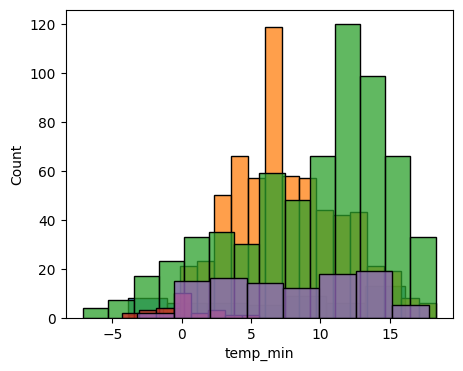

In [39]:
plt.figure(figsize=(5,4))
sns.histplot(data["temp_min"][data.weather=='drizzle'])
sns.histplot(data["temp_min"][data.weather=='rain'])
sns.histplot(data["temp_min"][data.weather=='sun'])
sns.histplot(data["temp_min"][data.weather=='snow'])
sns.histplot(data["temp_min"][data.weather=='fog'])


<Axes: xlabel='wind', ylabel='Count'>

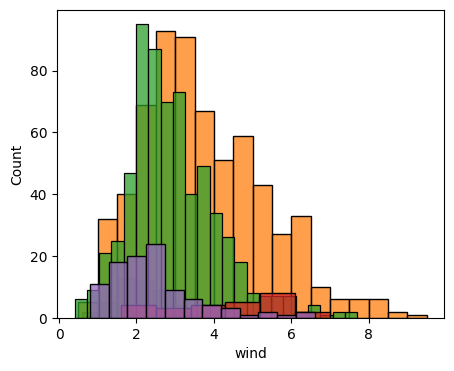

In [40]:
plt.figure(figsize=(5,4))
sns.histplot(data["wind"][data.weather=='drizzle'])
sns.histplot(data["wind"][data.weather=='rain'])
sns.histplot(data["wind"][data.weather=='sun'])
sns.histplot(data["wind"][data.weather=='snow'])
sns.histplot(data["wind"][data.weather=='fog'])


#### Multivariant Analysis

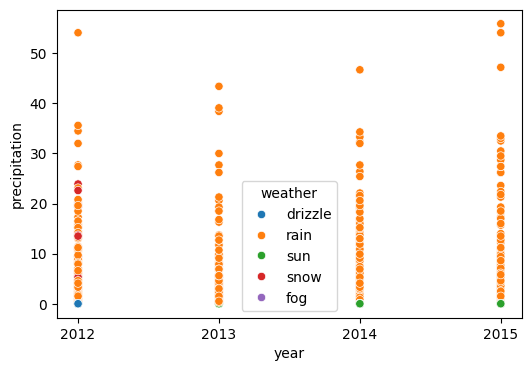

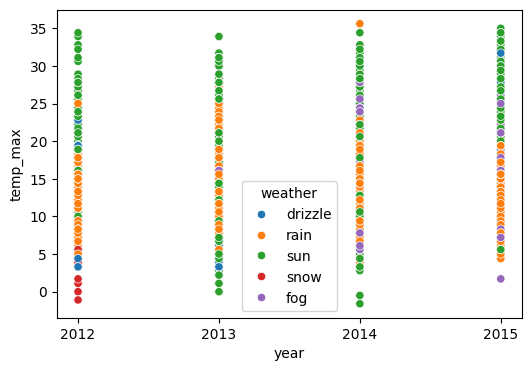

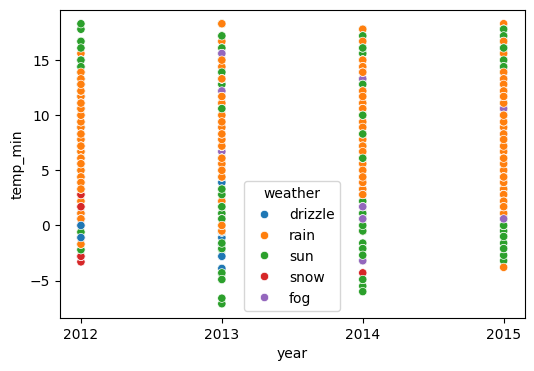

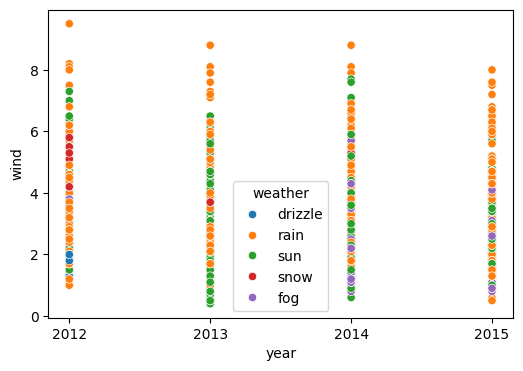

In [35]:
for i in column:
 plt.figure(figsize=(6,4))
 sns.scatterplot(x='year',y=i,hue="weather",data=data)
 plt.show()

# Train and Test data Spliting

In [45]:
x=data.drop('weather',axis=1)
y=data['weather']

# Feature Scaling

In [19]:
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.3)

# Algorithm 

### Logistic Regresssion

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Shani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
model.score(X_test,y_test)

0.7693059628543499

### Random forest Classifier

In [25]:
model=RandomForestClassifier(n_estimators= 10, criterion="entropy")
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [26]:
y_pred1=model.predict(X_test)

In [27]:
y_pred1

array([4, 2, 1, ..., 4, 4, 4])

In [28]:
model.score(X_test,y_test)

0.83088954056696

### Support Machine Classifier

In [29]:
classfier=SVC(kernel='linear',random_state=0)
classfier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred2=classfier.predict(X_test)

In [31]:
y_pred2

array([4, 2, 4, ..., 4, 4, 4])

In [32]:
metrics.accuracy_score(y_test,y_pred2)

0.8367546432062561

# Confusion matrix

In [33]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   5,   1,  34],
       [  1,   0,   5,   0,  66],
       [  0,   0, 380,   0,  68],
       [  0,   0,  18,   0,   1],
       [  0,   0,  37,   0, 407]], dtype=int64)